<a href="https://colab.research.google.com/github/akashsahu992906/machine-learning-projects-/blob/main/Autism_asd_identification_industry_grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading modules/libraries**

In [ ]:
import os                   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
def ignore_warn(*args,**kwargs):
   pass
warnings.warn=ignore_warn
from scipy.stats import skew,kurtosis,mode
plt.rcParams['figure.figsize']=10,6


In [ ]:
autism_train=pd.read_csv('/content/drive/MyDrive/autism project/dataset (1).csv')

**Dataset Description**

In [ ]:
autism_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jaundice         704 non-null    object
 14  autism           704 non-null    object
 15  country_of_res   704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [ ]:
autism_train.shape

(704, 21)

In [ ]:
autism_train.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


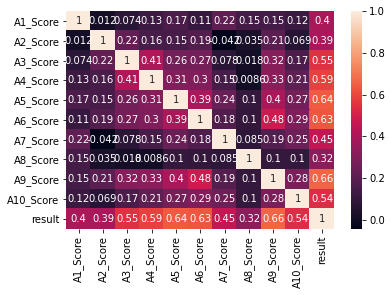

In [ ]:
sns.heatmap(autism_train.corr(),annot=True)

In [ ]:
autism_train=autism_train.drop('result',axis=1)

**Feature analysis and engineering**

*Target Variable*

In [ ]:
autism_train['Class_ASD'].value_counts()

NO      515
YES     188
YES}      1
Name: Class_ASD, dtype: int64

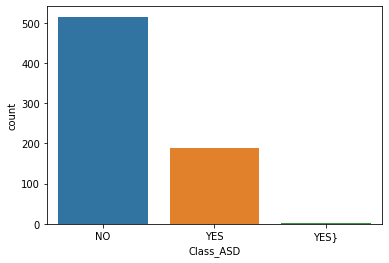

In [ ]:
#distribution of target variable
sns.countplot(autism_train['Class_ASD'])

In [ ]:
autism_train=autism_train.replace(to_replace=['YES}'],value='YES')

In [ ]:
autism_train['Class_ASD'].value_counts()

NO     515
YES    189
Name: Class_ASD, dtype: int64

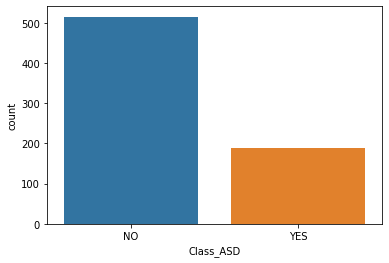

In [ ]:
sns.countplot(autism_train['Class_ASD'])

*Data Imbalance Handling*


In [ ]:
count_no,count_yes=autism_train.Class_ASD.value_counts()
aut_no=autism_train[autism_train['Class_ASD']=="NO"]
aut_yes=autism_train[autism_train['Class_ASD']=="YES"]

In [ ]:
aut_no=aut_no.sample(count_yes,random_state=100)

In [ ]:
aut_no.shape

(189, 20)

In [ ]:
autism_train=pd.concat([aut_yes,aut_no],axis=0)

In [ ]:
autism_train.Class_ASD.value_counts()

YES    189
NO     189
Name: Class_ASD, dtype: int64

*Unique values and most frequent values per group*

In [ ]:
unique_df=pd.DataFrame({'columns':autism_train.columns,'unique':[autism_train[i].unique() for i in autism_train.columns],'number of unique':[len(autism_train[i].unique()) for i in autism_train.columns],'most_frequent':[autism_train[i].value_counts().head(1).index[0] for i in autism_train.columns]})
unique_df

,columns,unique,number of unique,most_frequent
0,A1_Score,"[1, 0]",2,1
1,A2_Score,"[1, 0]",2,1
2,A3_Score,"[0, 1]",2,1
3,A4_Score,"[1, 0]",2,1
4,A5_Score,"[1, 0]",2,1
5,A6_Score,"[0, 1]",2,0
6,A7_Score,"[1, 0]",2,1
7,A8_Score,"[1, 0]",2,1
8,A9_Score,"[1, 0]",2,0
9,A10_Score,"[1, 0]",2,1


In [ ]:
#Dropping the column with the least variance and unique values 
autism_train=autism_train.drop('age_desc',axis=1)

*Missing values*

In [ ]:
missing_df=pd.DataFrame({'columns':autism_train.columns,'missing_values':[sum(autism_train[x].isna()) for x in autism_train.columns],'missing_ratio':[sum(autism_train[x].isna())/autism_train.shape[0] for x in autism_train.columns]})

In [ ]:
missing_df_greater_than_zero=missing_df[missing_df['missing_values']>0]
missing_df_greater_than_zero.sort_values(by='missing_ratio',ascending=False) 

,columns,missing_values,missing_ratio


*Replace all '?' instances with the mode of the column*


In [ ]:
autism_train['relation'].unique()

array(['Self', 'Parent', '?', "'Health care professional'", 'Relative',
       'Others'], dtype=object)

In [ ]:
autism_train['relation']=autism_train['relation'].str.replace('?','Self')

In [ ]:
autism_train['relation'].unique()

array(['Self', 'Parent', "'Health care professional'", 'Relative',
       'Others'], dtype=object)

In [ ]:
autism_train['ethnicity'].unique()

array(['White-European', 'Latino', '?', 'Others', 'Asian',
       "'Middle Eastern '", 'Pasifika', 'Black', "'South Asian'",
       'Hispanic', 'Turkish', 'others'], dtype=object)

In [ ]:
autism_train['ethnicity']=autism_train['ethnicity'].str.replace('?','White-European')

In [ ]:
autism_train['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Asian', "'Middle Eastern '",
       'Pasifika', 'Black', "'South Asian'", 'Hispanic', 'Turkish',
       'others'], dtype=object)

In [ ]:
autism_train['age'].unique()

array(['26', '24', '27', '35', '40', '36', '64', '29', '17', '33', '18',
       '31', '43', '37', '55', '34', '53', '20', '30', '21', '383', '47',
       '28', '32', '44', '19', '45', '42', '22', '39', '25', '38', '23',
       '54', '60', '50', '41', '46', '56', '58', '61', '59', '52', '48',
       '51', '49', '?'], dtype=object)

In [ ]:
autism_train['age']=autism_train['age'].str.replace('?','21')

In [ ]:
autism_train['age'].unique()

array(['26', '24', '27', '35', '40', '36', '64', '29', '17', '33', '18',
       '31', '43', '37', '55', '34', '53', '20', '30', '21', '383', '47',
       '28', '32', '44', '19', '45', '42', '22', '39', '25', '38', '23',
       '54', '60', '50', '41', '46', '56', '58', '61', '59', '52', '48',
       '51', '49'], dtype=object)

In [ ]:
autism_train['age']=autism_train.age.astype('int64')

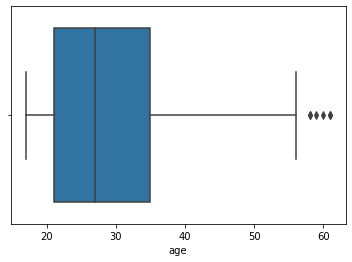

In [ ]:
#check for outliers 
sns.boxplot(autism_train['age'])

In [ ]:
#drop outliers 
autism_train=autism_train.drop(autism_train[autism_train['age']>150].index,axis=0)

skew of age is 1.018993345815813


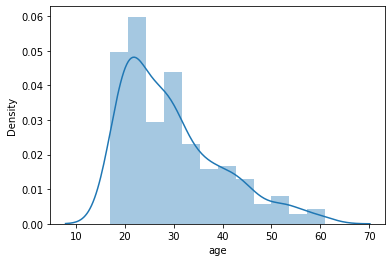

In [ ]:
sns.distplot(autism_train['age'])
print('skew of age is {}'.format(skew(autism_train['age'])))

*Barplots*

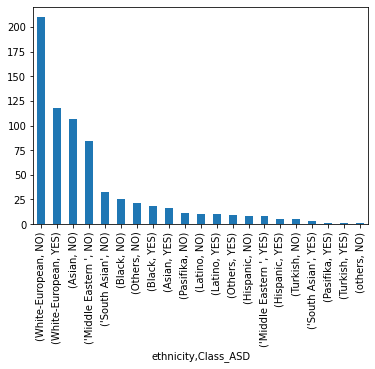

In [ ]:
#ethnicity with most asd cases 
autism_train.groupby(['ethnicity','Class_ASD'])['Class_ASD'].count().sort_values(ascending=False).plot(kind="bar",stacked=False)

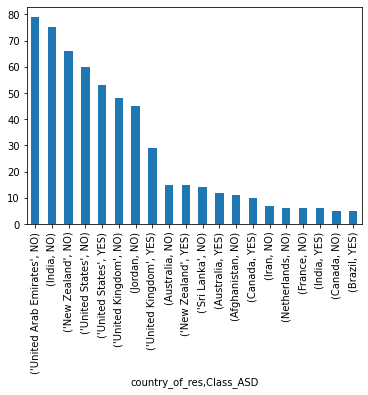

In [ ]:
#country with most asd cases
autism_train.groupby(['country_of_res','Class_ASD'])['Class_ASD'].count().sort_values(ascending=False).head(20).plot(kind="bar",stacked=False)

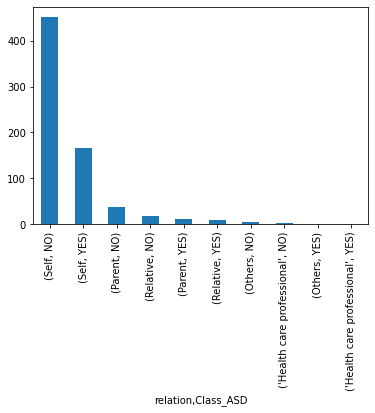

In [ ]:
#'relations' column relation with asd cases 
autism_train.groupby(['relation','Class_ASD'])['Class_ASD'].count().sort_values(ascending=False).head(20).plot(kind="bar",stacked=False)

Text(0.5, 1.0, 'counts of autism')

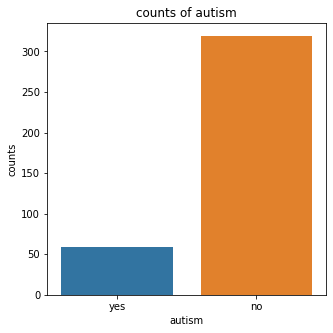

In [ ]:
#autism variable
plt.figure(figsize=(5,5))
sns.countplot(autism_train['autism'])
plt.xlabel('autism')
plt.ylabel('counts')
plt.title('counts of autism')

In [ ]:
#relation of class_ASD with classical autism 
pd.crosstab(autism_train['autism'],autism_train['Class_ASD'])

Class_ASD,NO,YES
autism,,
no,173,146
yes,16,43


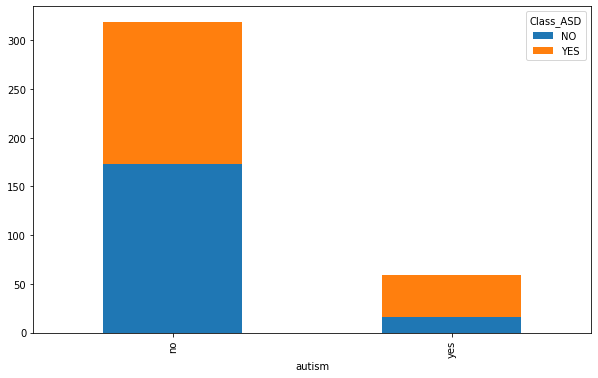

In [ ]:
#relation of class_ASD with classical autism
pd.crosstab(autism_train['autism'],autism_train['Class_ASD']).plot(kind="bar",stacked=True)

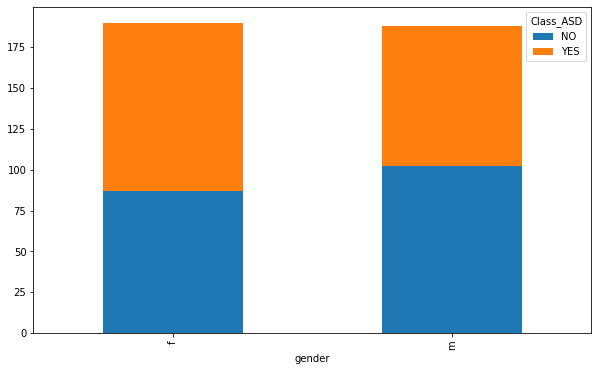

In [ ]:
#relation of class_ASD with gender
pd.crosstab(autism_train['gender'],autism_train['Class_ASD']).plot(kind="bar",stacked=True)

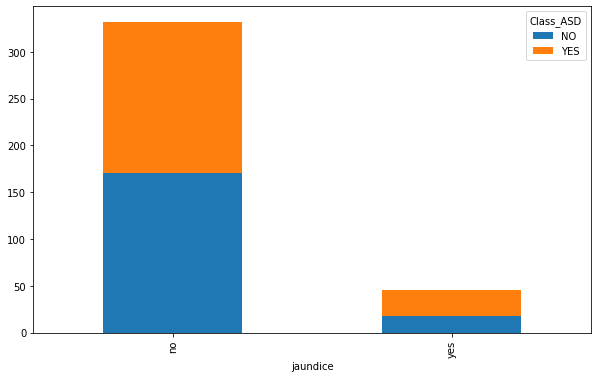

In [ ]:
#relation of class_ASD with jaundice 
pd.crosstab(autism_train['jaundice'],autism_train['Class_ASD']).plot(kind="bar",stacked=True)

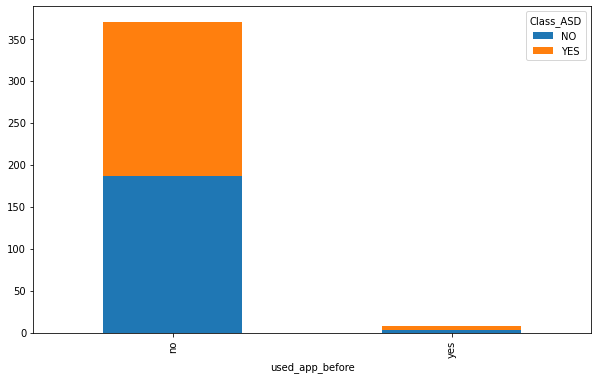

In [ ]:
#relation of class_ASD with 'used app before' column 
pd.crosstab(autism_train['used_app_before'],autism_train['Class_ASD']).plot(kind="bar",stacked=True)

*Categorical Features Encoding*

In [ ]:
cols=['jaundice','autism','Class_ASD','used_app_before']
cat_var=[var for var in autism_train.columns if autism_train[var].dtypes=='O' if var not in cols]
cat_var

['gender', 'ethnicity', 'country_of_res', 'relation']

In [ ]:
autism_train['country_of_res'].value_counts().sort_values(ascending=False)

'United States'           113
'United Arab Emirates'     82
India                      81
'New Zealand'              80
'United Kingdom'           77
Jordan                     47
Australia                  27
Canada                     15
'Sri Lanka'                14
Afghanistan                13
France                     11
Netherlands                10
Brazil                      9
Mexico                      8
Iran                        7
Russia                      7
Ireland                     5
Malaysia                    5
Italy                       5
'Viet Nam'                  5
Austria                     4
'Saudi Arabia'              4
Philippines                 4
Germany                     4
Bangladesh                  3
Romania                     3
Belgium                     3
Spain                       3
Egypt                       3
Kazakhstan                  3
Pakistan                    3
Bahamas                     2
Ethiopia                    2
AmericanSa

In [ ]:
#one hot top 15 encoding
def encode(df,column):
         top10=df[column].value_counts().sort_values(ascending=False).head(15).index
         for categories in top10:
            df[categories]=np.where(df[column]==categories,1,0)

In [ ]:
for i in cat_var:
  encode(autism_train,i)

In [ ]:
autism_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,relation,Class_ASD,f,m,White-European,Asian,'Middle Eastern ',Black,Others,Latino,'South Asian',Hispanic,Turkish,Pasifika,others,'United States','United Kingdom','New Zealand',India,'United Arab Emirates',Jordan,Australia,Canada,France,Afghanistan,Brazil,Netherlands,Malaysia,Iran,Mexico,Self,Parent,Relative,'Health care professional'
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,Parent,YES,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,1,1,1,1,0,1,1,1,1,36,m,Others,yes,no,'United States',no,Self,YES,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,1,1,1,1,0,1,1,1,1,0,17,m,Asian,yes,yes,Bahamas,no,'Health care professional',YES,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,1,1,1,1,1,1,1,1,1,1,33,m,White-European,no,no,'United States',no,Relative,YES,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15,1,0,0,1,1,1,1,1,0,1,37,f,White-European,no,yes,'United States',no,Self,YES,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
autism_train=autism_train.drop(cat_var,axis=1)

In [ ]:
autism_train['jaundice']=autism_train['jaundice'].replace({'no':0,'yes':1})
autism_train['autism']=autism_train['autism'].replace({'no':0,'yes':1})
autism_train['used_app_before']=autism_train['used_app_before'].replace({'no':0,'yes':1})

In [ ]:
y_train=autism_train.pop('Class_ASD')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y_train=lb.fit_transform(y_train)

In [ ]:
y_train_Df=pd.DataFrame(y_train)

 **Feature Selection (ONLY USED MUTUAL INFO, REST FOR VISUALISATION)**

*PCA* (dont use for code just for visualisation)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scalerstd=sc.fit_transform(autism_train)

Text(0, 0.5, 'Cumulative explained variance')

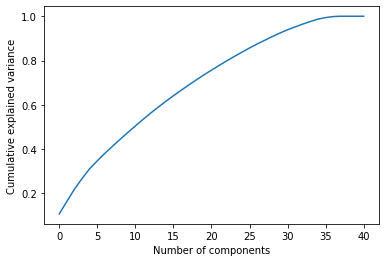

In [ ]:
from sklearn.decomposition import PCA
pca=PCA().fit(scalerstd)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1074645 , 0.16416563, 0.21966256, 0.26762015, 0.3118662 ,
       0.34752495, 0.38127382, 0.41307206, 0.44460885, 0.47499901,
       0.50478076, 0.53402063, 0.56248848, 0.58945628, 0.61584144,
       0.64113508, 0.66541461, 0.68927139, 0.71246983, 0.73503563,
       0.75648776, 0.77783616, 0.7983357 , 0.81846195, 0.83766196,
       0.85671142, 0.87461235, 0.89148171, 0.90826853, 0.92417013,
       0.93889032, 0.95190005, 0.96471607, 0.97627534, 0.98698945,
       0.99397942, 0.9985752 , 1.        , 1.        , 1.        ,
       1.        ])

*Pearson correlation* (not for code only visualisation)

<Figure size 1080x720 with 0 Axes>

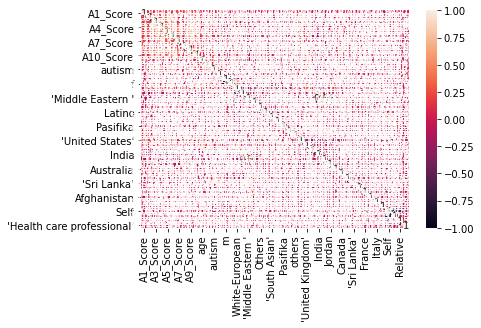

<Figure size 1080x720 with 0 Axes>

In [ ]:
corr1=autism_train.corr()
sns.heatmap(corr1,annot=True)   
plt.figure(figsize=(15,10))

In [ ]:

autism_train['Class_ASD']=autism_train['Class_ASD'].replace({'NO':0,'YES':1})

In [ ]:

for i in autism_train.columns:
     corr2=autism_train['Class_ASD'].corr(autism_train[i])
     
     print("the correlation of target variable with {} is {}".format(i,corr2))

the correlation of target variable with A1_Score is 0.3168272504715563
the correlation of target variable with A2_Score is 0.3603992792021628
the correlation of target variable with A3_Score is 0.5074702335617393
the correlation of target variable with A4_Score is 0.5874751806435631
the correlation of target variable with A5_Score is 0.6014869911280522
the correlation of target variable with A6_Score is 0.6221829494245718
the correlation of target variable with A7_Score is 0.41270418951146404
the correlation of target variable with A8_Score is 0.24880398920055757
the correlation of target variable with A9_Score is 0.6780178412413093
the correlation of target variable with A10_Score is 0.4526787302125928
the correlation of target variable with age is 0.14523987660997575
the correlation of target variable with jaundice is 0.09898780050533527
the correlation of target variable with autism is 0.1968078499226869
the correlation of target variable with used_app_before is 0.01735264020984521


*Mutual information*

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(autism_train,y_train_Df,random_state=50)
mutual_info

array([0.10797471, 0.02787595, 0.13179842, 0.16270394, 0.20274277,
       0.19486114, 0.04979998, 0.0596751 , 0.22377568, 0.09902768,
       0.04515805, 0.        , 0.        , 0.        , 0.04744835,
       0.01371699, 0.0093826 , 0.02632957, 0.06525277, 0.        ,
       0.01032569, 0.06229117, 0.00338214, 0.        , 0.        ,
       0.        , 0.03083409, 0.03985064, 0.03007929, 0.09907689,
       0.01299737, 0.        , 0.        , 0.0297134 , 0.        ,
       0.02120964, 0.02962166, 0.        , 0.00243101, 0.04261155,
       0.00973142, 0.02089516, 0.        , 0.        , 0.01610727])

In [ ]:
mutual_info = pd.DataFrame(mutual_info,index=autism_train.columns)

mutual_info['mutual_info_score']=mutual_info[0]
mutual_info=mutual_info.drop(0,axis=1)

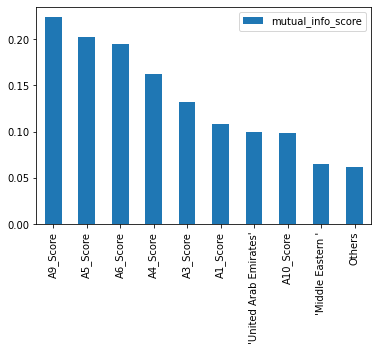

In [ ]:
mutual_info.sort_values("mutual_info_score",ascending=False).head(10).plot(kind="bar")

In [ ]:
mutual_info_nil=mutual_info[mutual_info['mutual_info_score']==0]

In [ ]:
mutual_info_nil

,mutual_info_score
jaundice,0.0
autism,0.0
used_app_before,0.0
Black,0.0
Hispanic,0.0
Turkish,0.0
Pasifika,0.0
Jordan,0.0
Australia,0.0
Brazil,0.0


In [ ]:
cols=[cols for cols in mutual_info_nil.index]
autism_train=autism_train.drop(cols,axis=1)

**Model creation**

In [ ]:
def model_eval(y_t,y_p):
  from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
  classification_rep=classification_report(y_t,y_p)
  print("CLASSIFICATION REPORT")
  print(classification_rep)
  print("         Confusion matrix      ")
  confusion_mat=confusion_matrix(y_t,y_p)
  conf_mat_df=pd.DataFrame(data=confusion_mat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  sns.heatmap(conf_mat_df,annot=True,fmt='d',cbar=True,cmap='BrBG')
  rocauc=roc_auc_score(y_test,y_pred)
  print("ROC AUC Score is {}".format(rocauc))

In [ ]:
def stratkfold(model):
    from sklearn.model_selection import StratifiedKFold,cross_val_score
    kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
    cv_score=cross_val_score(model,autism_train,y_train,cv=kfold,scoring='accuracy',n_jobs=-1)
    print("the cross validation mean is {}".format(cv_score.mean()))

*Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=50)
lr.fit(autism_train,y_train)
lr.score(autism_train,y_train)

1.0

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test=train_test_split(autism_train,y_train,test_size=0.2,stratify=y_train,shuffle=True,random_state=100)
lr.fit(x_train,y_train2)
lr.score(x_train,y_train2),lr.score(x_test,y_test)

(0.9933774834437086, 0.9736842105263158)

*K fold cross validation*

In [ ]:
stratkfold(lr)

the cross validation mean is 0.9788070175438597


In [ ]:
y_pred=lr.predict(x_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.95      1.00      0.97        38

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76

         Confusion matrix      
ROC AUC Score is 0.9736842105263158


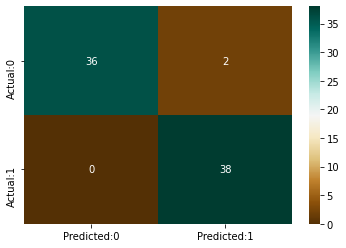

In [ ]:
#model evaluation
model_eval(y_test,y_pred)

*Multinomial Naive Bayes*

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(autism_train,y_train)
mnb.score(autism_train,y_train)

0.91005291005291

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test=train_test_split(autism_train,y_train,test_size=0.2,stratify=y_train,shuffle=True,random_state=100)
mnb.fit(x_train,y_train2)
mnb.score(x_train,y_train2),mnb.score(x_test,y_test)

(0.890728476821192, 0.9342105263157895)

*K fold cross validation*

In [ ]:
stratkfold(mnb)

the cross validation mean is 0.8994736842105263


In [ ]:
y_pred=mnb.predict(x_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.90      0.97      0.94        38

    accuracy                           0.93        76
   macro avg       0.94      0.93      0.93        76
weighted avg       0.94      0.93      0.93        76

         Confusion matrix      
ROC AUC Score is 0.9342105263157895


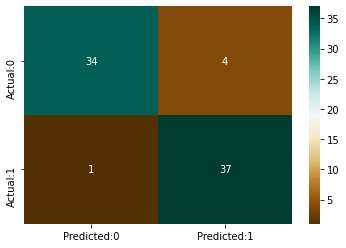

In [ ]:
#model evaluation
model_eval(y_test,y_pred)

*Light GBM*

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test=train_test_split(autism_train,y_train,test_size=0.2,stratify=y_train,shuffle=True,random_state=100)
lgbm.fit(x_train,y_train2)
lgbm.score(x_train,y_train2),lgbm.score(x_test,y_test)

(1.0, 0.9605263157894737)

*k fold cross validation*

In [ ]:
stratkfold(lgbm)

the cross validation mean is 0.9681403508771929


In [ ]:
y_pred=lgbm.predict(x_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.97      0.95      0.96        38

    accuracy                           0.96        76
   macro avg       0.96      0.96      0.96        76
weighted avg       0.96      0.96      0.96        76

         Confusion matrix      
ROC AUC Score is 0.9605263157894737


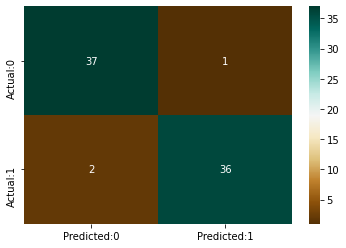

In [ ]:
model_eval(y_test,y_pred)

*Xgboost*

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test=train_test_split(autism_train,y_train,test_size=0.2,stratify=y_train,shuffle=True,random_state=100)
xgb.fit(x_train,y_train2)
xgb.score(x_train,y_train2),xgb.score(x_test,y_test)

(1.0, 0.9736842105263158)

In [ ]:
#cross val score 
stratkfold(xgb)

the cross validation mean is 0.9709122807017545


In [ ]:
y_pred=xgb.predict(x_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.97      0.97      0.97        38

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76

         Confusion matrix      
ROC AUC Score is 0.9736842105263158


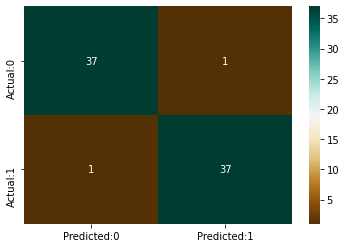

In [ ]:
#model evaluation
model_eval(y_test,y_pred)

*SVM*

In [ ]:
from sklearn.svm import SVC 
svc=SVC(kernel='linear')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test=train_test_split(autism_train,y_train,test_size=0.2,stratify=y_train,shuffle=True,random_state=100)
svc.fit(x_train,y_train2)
svc.score(x_train,y_train2),svc.score(x_test,y_test)

(0.9966887417218543, 0.9868421052631579)

In [ ]:
#cross validation score 
stratkfold(svc)

the cross validation mean is 0.994701754385965


In [ ]:
y_pred=svc.predict(x_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      1.00      0.99        38

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76

         Confusion matrix      
ROC AUC Score is 0.986842105263158


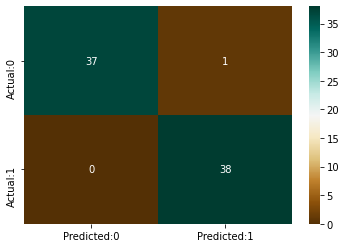

In [ ]:
#model evaluation 
model_eval(y_test,y_pred)

*Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test=train_test_split(autism_train,y_train,test_size=0.2,stratify=y_train,shuffle=True,random_state=100)
rf.fit(x_train,y_train2)
rf.score(x_train,y_train2),rf.score(x_test,y_test)

(1.0, 0.9605263157894737)

In [ ]:
#cross validation 
stratkfold(rf)

the cross validation mean is 0.9655438596491228


In [ ]:
y_pred=rf.predict(x_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.95      0.97      0.96        38

    accuracy                           0.96        76
   macro avg       0.96      0.96      0.96        76
weighted avg       0.96      0.96      0.96        76

         Confusion matrix      
ROC AUC Score is 0.9605263157894739


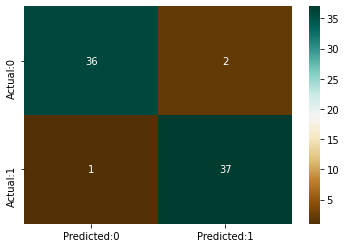

In [ ]:
# model evaluation 
model_eval(y_test,y_pred)